In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ori_tibu=pd.read_excel('GSAF5.xls')
tiburon=ori_tibu

1º PASO. Hacemos una copia del contenido.

In [2]:
tiburon=ori_tibu

2º PASO: iniciamos la limpieza del mismo. Para ellos pasamos a convertir los nombres de las columnas en minúscolas y sin espacio entre ellos y eliminamos las columnas que no nos sirvan, ya sea porque no tienen contenido o porque durante el análisis no le vamos a usar.

In [3]:
tiburon.columns=tiburon.columns.str.lower().str.replace(" ","_")

In [4]:

tiburon = tiburon.drop('unnamed:_11', axis=1)
tiburon = tiburon.drop('unnamed:_21', axis=1)
tiburon = tiburon.drop('unnamed:_22', axis=1)
tiburon = tiburon.drop('case_number', axis=1)
tiburon = tiburon.drop('href_formula', axis=1)
tiburon = tiburon.drop('pdf', axis=1)
tiburon = tiburon.drop('href', axis=1)
tiburon = tiburon.drop('original_order', axis=1)
tiburon = tiburon.drop('source', axis=1)
tiburon = tiburon.drop('case_number.1', axis=1)

In [5]:
tiburon.dropna(how='all',inplace=True)

3º PASO: organizar las columnas y la información que hay en ella.

<big>Unificacion de valores dentro de la columna SEX</big>

In [6]:
tiburon['sex'].replace((' nan','.','lli','N'), 0,inplace=True)
tiburon['sex'].replace(('M',' M','M x 2','M '), 2 ,inplace=True)
tiburon['sex'].replace(('F'), 1,inplace=True)

<big>Unificacion de valores dentro de la columna INJURY</big>

In [7]:
tiburon['injury'].replace(('PROVOKED INCIDENT'),'Unknown.' ,inplace=True)
tiburon['injury'].fillna('Unknown.', inplace=True)
tiburon.loc[tiburon['injury'].str.contains('FATAL|No survivors|dead', case=False, na=False), 'injury'] = 'Fatal'
tiburon.loc[tiburon['injury'].str.contains('severed|Serious injury|serious injury', case=False, na=False), 'injury'] = 'Severious injury'
tiburon.loc[tiburon['injury'].str.contains( 'brok', case=False, na=False), 'injury'] = 'Broken-bones'
tiburon.loc[tiburon['injury'].str.contains('lacerations|laceratedLaceration|Lacer', case=False, na=False), 'injury'] = 'Laceraciones'
tiburon.loc[tiburon['injury'].str.contains('amputated', case=False, na=False), 'injury'] = 'Amputated'
tiburon.loc[tiburon['injury'].str.contains('Bit|Bite|biten|bite|Biten|bitten', case=False, na=False), 'injury'] = 'Bitten'
tiburon.loc[tiburon['injury'].str.contains('injury|Injury|injuries|Injuries|injured|wound', case=False, na=False), 'injury'] = 'Injury'
tiburon.loc[tiburon['injury'].str.contains('gash|scratch', case=False, na=False), 'injury'] = 'Gash'
tiburon.loc[tiburon['injury'].str.contains('nipped', case=False, na=False), 'injury'] = 'Nipped'
tiburon.loc[tiburon['injury'].str.contains('Abrasions|abrasions|Abrasion', case=False, na=False), 'injury'] = 'Abrasions'
tiburon.loc[tiburon['injury'].str.contains('injuring|abraded|Minor', case=False, na=False), 'injury'] = 'Minor injury'
tiburon.loc[tiburon['injury'].str.contains('Brui', case=False, na=False), 'injury'] = 'Bruised'
tiburon.loc[tiburon['injury'].str.contains('mort', case=False, na=False), 'injury'] = 'Ataque post-mortem'
tiburon.loc[tiburon['injury'].str.contains('Cut', case=False, na=False), 'injury'] = 'Cuts'
tiburon.loc[tiburon['injury'].str.contains('kayak|boat|Dinghy', case=False, na=False), 'injury'] = 'Daños materiales'
tiburon.loc[tiburon['injury'].str.contains('Puncture|puncture', case=False, na=False), 'injury'] = 'Puncture'
tiburon.loc[tiburon['injury'].str.contains('drowning|drowned', case=False, na=False), 'injury'] = 'Drowning'
tiburon.loc[tiburon['injury'].str.contains('No Inju|No inury', case=False, na=False), 'injury'] = 'No Injury'
causas=['Bitten', 'Injurie', 'Laceraciones', 'Fatal', 'We need more information.', 'Survived', 'Amputated', 'Drowning', 'Minor injury', 'Puncture', 'Cuts', 'Abrasions', 'Gash', 'Broken bones', 'Daños materiales', 'Bruised', 'Nipped', 'No Injury']
tiburon['injury'] = tiburon['injury'].apply(lambda x: x if x in  causas else 'Others')

Aquí, procedo a ponerle un valor numérico al tipo de daño. Siendo el fallecimiento la consecuencia más grave y que corresponde a 1 y los daños materiales, los casos cuyos resultados son desconocidos o aquellos cuyos resultados fueron sin daños como 5

In [8]:
tiburon['injury'].replace(('Fatal' or 'Drowning'), 0,inplace=True)
tiburon['injury'].replace(('Drowning'), 0,inplace=True)
tiburon['injury'].replace(('Bitten'), 1 ,inplace=True)
tiburon['injury'].replace(('Amputated'), 1 ,inplace=True)
tiburon['injury'].replace(('Laceraciones'), 3,inplace=True)
tiburon['injury'].replace(('Cuts'),2,inplace=True)
tiburon['injury'].replace(('Puncture' ), 2,inplace=True)
tiburon['injury'].replace(('Abrasions'),3,inplace=True)
tiburon['injury'].replace(('Nipped'), 3,inplace=True)
tiburon['injury'].replace(('Bruised'),3,inplace=True)
tiburon['injury'].replace(('Gash'), 3,inplace=True)
tiburon['injury'].replace(('Daños materiales'), 5,inplace=True)
tiburon['injury'].replace(('Others'),5 ,inplace=True)
tiburon['injury'].replace(('No Injury'),5 ,inplace=True)
tiburon['injury'].replace(('Survived'),5 ,inplace=True)
tiburon['injury'].replace(('Minor injury'),4 ,inplace=True)


<big>Unificacion de valores dentro de la columna ACTIVITY</big>

In [9]:
tiburon.loc[tiburon['activity'].str.contains('Swim', case=False, na=False), 'activity'] = 'Swimming'
tiburon.loc[tiburon['activity'].str.contains('Bat', case=False, na=False), 'activity'] = 'Bathing'
tiburon.loc[tiburon['activity'].str.contains('Sur', case=False, na=False), 'activity'] = 'Surf'
tiburon.loc[tiburon['activity'].str.contains('fis' or 'net', case=False, na=False), 'activity'] = 'Fishing'
tiburon.loc[tiburon['activity'].str.contains('div', case=False, na=False), 'activity'] = 'Diving'
tiburon.loc[tiburon['activity'].str.contains('Fell', case=False, na=False), 'activity'] = 'Fell into the water '
tiburon.loc[tiburon['activity'].str.contains('Flo'or 'Treading water', case=False, na=False), 'activity'] = 'Floating '
tiburon.loc[tiburon['activity'].str.contains('Paddle', case=False, na=False), 'activity'] = 'Paddle boarding'
tiburon.loc[tiburon['activity'].str.contains('Jum', case=False, na=False), 'activity'] = 'Jumping' 
tiburon.loc[tiburon['activity'].str.contains('Phot' or 'fil', case=False, na=False), 'activity'] = 'Photography and filming' 
tiburon.loc[tiburon['activity'].str.contains('Air', case=False, na=False), 'activity'] = 'Air Disaster'
tiburon.loc[tiburon['activity'].str.contains('Feed', case=False, na=False), 'activity'] = 'Feeding a shark'
tiburon.loc[tiburon['activity'].str.contains('cano', case=False, na=False), 'activity'] = 'Canoe'
tiburon.loc[tiburon['activity'].str.contains('Bod', case=False, na=False), 'activity'] = 'Body boarding'
tiburon.loc[tiburon['activity'].str.contains('disaster|swamped|Lifesaving', case=False, na=False), 'activity'] = 'Sea disaster'
actividades_acuaticas = ["Surf","Fishing", "Swimming","Diving","Bathing","Wading","Snorkeling", "Standing", "Fell into the water","Body boarding", "Sea disaster", "Floating", "Boogie boarding", "Kayaking", "Treading water", "Paddle boarding", "Jumping",  "Canoe", "Walking", "Boogie Boarding", "Feeding a shark", "Playing", "Rowing", "Sailing"]
tiburon['activity'] = tiburon['activity'].apply(lambda x: x if x in actividades_acuaticas else 'Others')

<big>Unificacion de valores dentro de la columna ESPECIES</big>

In [10]:
tiburon.rename(columns={"species_": "species"}, inplace = True)
tiburon.loc[tiburon['species'].str.contains('whit', case=False, na=False), 'species'] = 'White shark'
tiburon.loc[tiburon['species'].str.contains('tiger', case=False, na=False), 'species'] = 'Tiger shark'
tiburon.loc[tiburon['species'].str.contains('mak', case=False, na=False), 'species'] = 'Mako shark'
tiburon.loc[tiburon['species'].str.contains('ull', case=False, na=False), 'species'] = 'Bull shark'
tiburon.loc[tiburon['species'].str.contains('oppe', case=False, na=False), 'species'] = 'Cooper shark'
tiburon.loc[tiburon['species'].str.contains('reef', case=False, na=False), 'species'] = 'Grey reef shark'
tiburon.loc[tiburon['species'].str.contains('urse', case=False, na=False), 'species'] = 'Nurse shark'
tiburon.loc[tiburon['species'].str.contains('beag', case=False, na=False), 'species'] = 'Porbeagle shark'
tiburon.loc[tiburon['species'].str.contains('onze', case=False, na=False), 'species'] = 'Bronze whaler shark'
tiburon.loc[tiburon['species'].str.contains('lue', case=False, na=False), 'species'] = 'Blue shark.'
tiburon.loc[tiburon['species'].str.contains('emon', case=False, na=False), 'species'] = 'Lemon shark.'
tiburon.loc[tiburon['species'].str.contains('tip', case=False, na=False), 'species'] = 'Blacktip shark.'
tiburon.loc[tiburon['species'].str.contains('pago', case=False, na=False), 'species'] = 'Galapagos shark.'
tiburon.loc[tiburon['species'].str.contains('pinner', case=False, na=False), 'species'] = 'Spinner shark.'
tiburon.loc[tiburon['species'].str.contains('Dusky', case=False, na=False), 'species'] = 'Dusky shark.'
tiburon['species'].fillna('Unknown shark', inplace=True)
shark_list = ["Unknown shark", "White shark", "We need more information", "Tiger shark",  "Bull shark",  "Blacktip shark",  "Nurse shark",   "Grey reef shark",  "Bronze whaler shark",  "Blue shark",  "Mako shark", "Lemon shark"]
tiburon['species'] = tiburon['species'].apply(lambda x: x if x in shark_list else 'Unknown shark')
tiburon.loc[tiburon['species'].str.contains('stionable|prior|nvali|not confirmed', case=False, na=False), 'species'] = 'We need more information.'

<big>Unificacion de valores dentro de la columna COUNTRY</big>

In [11]:
tiburon['country'] = tiburon['country'].str.lower()
tiburon['country'] = tiburon['country'].str.capitalize()
tiburon.loc[tiburon['country'].str.contains('rea', case=False, na=False), 'country'] = 'south korea'
tiburon.loc[tiburon['country'].str.contains('bri|sco', case=False, na=False), 'country'] = 'great britain'
tiburon.loc[tiburon['country'].str.contains('engl' or  'grans'or 'sco', case=False, na=False), 'country'] = 'great britain'
tiburon.loc[tiburon['country'].str.contains('sea|ocean', case=False, na=False), 'country'] = 'inteternational waters'
tiburon.loc[tiburon['country'].str.contains('elle', case=False, na=False), 'country'] = 'seychelles'
tiburon.loc[tiburon['country'].str.contains('ceyl', case=False, na=False), 'country'] = 'sri lanka'
tiburon.loc[tiburon['country'].str.contains('PPINES', case=False, na=False), 'country'] = 'philippines'

<big>Creación de la columna OCEANS AND SEAS</big>

In [13]:
tiburon['oceans_and_seas'] = tiburon['country']
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].str.lower()
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].str.capitalize()
Oceano_Indico = ['South Africa', 'Mozambique', 'India', 'Australia', 'Indonesia']
Mar_Mediterraneo = ['Spain', 'France', 'Italy', 'Greece', 'Turkey', 'Egypt']
Oceano_Pacifico = ['United States', 'philippines','Canada', 'Mexico', 'Japan', 'Australia', 'Chile']
Mar_Caribe = ['Cuba', 'Dominican Republic', 'Haiti', 'Jamaica', 'Puerto Rico']
Mar_del_Norte = ['United Kingdom', 'Norway', 'Denmark', 'Germany', 'Netherlands', 'Belgium']
Oceano_Atlantico = [ "Usa", "United States", "Canada", "Mexico", "Guatemala", "Belize", "Honduras", "Nicaragua", "Costa Rica", "Panama","Colombia", "Venezuela", "Guyana", "Suriname", "French Guiana", "Brazil", "Uruguay", "Argentina","Falkland Islands", "South Georgia and the South Sandwich Islands", "Chile","United Kingdom", "Portugal", "Spain", "France", "Ireland","Norway", "Iceland", "Greenland", "Denmark", "Netherlands (Aruba, Curacao, Sint Maarten, Bonaire, Sint Eustatius, Saba)"]
Mar_Baltico = ['Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland']
Mar_Negro = ['Romania', 'Bulgaria', 'Turkey', 'Ukraine', 'Russia']
Mar_China_Meridional = ['Vietnam', 'Philippines', 'Malaysia', 'Indonesia', 'Brunei']
Oceano_Artico = ['Canada', 'Greenland', 'Norway', 'Russia', 'United States']
Mar_Tasmania = ['Australia', 'New Zealand']
Golfo_Persico = ['Iran', 'Iraq', 'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

tiburon['oceans_and_seas'] = tiburon['country']
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Golfo_Persico else 'Golfo_Persico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Tasmania else 'Mar_Tasmania')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Oceano_Artico else 'Oceano_Artico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Tasmania else 'Mar_Tasmania')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_China_Meridional else 'Mar_China_Meridional')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Negro else 'Mar_Negro')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Baltico else 'Mar_Baltico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_del_Norte else 'Mar_del_Norte')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Caribe else 'Mar_Caribe')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Oceano_Pacifico else 'Oceano_Pacifico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Oceano_Artico else 'Oceano_Artico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Oceano_Indico else 'Oceano_Indico')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Mar_Mediterraneo else 'Mar_Mediterraneo')
tiburon['oceans_and_seas'] = tiburon['oceans_and_seas'].apply(lambda x: x if x not in Oceano_Atlantico else 'Oceano_Atlantico')                                                            



<big>Unificacion de valores dentro de la columna AGE</big>

#Revisión de tabla AGE.
En primer lugar apliqué el siguiente código pero me dí cuenta de que era menos funcional en forma de str que como números en si. lO DEJO AQUÍ A MODO DE MARKDOWN ya que puede ser interesante para otros motivos
tiburon['age'].fillna('Unknown.', inplace=True)
tiburon.loc[pd.to_numeric(tiburon['age'], errors='coerce') <= 18, 'age'] = 'Under 18 years old'
tiburon.loc[pd.to_numeric(tiburon['age'], errors='coerce') >= 65, 'age'] = 'Seniors'
tiburon.loc[pd.to_numeric(tiburon['age'], errors='coerce') <= 65, 'age'] = 'Adults'

tiburon.loc[tiburon['age'].str.contains('Elderly', case=False, na=False), 'age'] = 'Seniors.'
tiburon.loc[tiburon['age'].str.contains('30|20|21|33|23|25|36|46|40|50|60|adu|middle', case=False, na=False), 'age'] = 'Adults'
tiburon.loc[tiburon['age'].str.contains('7|8|young|teen|month|9|11|12|13|14|15|6½|2½|!6|!2|16', case=False, na=False), 'age'] = 'Under 18 years old'
edades=['Under 18 years old', 'Seniors' , 'Adults']
tiburon['age'] = tiburon['age'].apply(lambda x: x if x in edades else 'Unknown')
tiburon['age'].value_counts()

In [14]:
tiburon['age'].fillna(0, inplace=True)
tiburon['age'] = tiburon['age'].str.replace("30s", "35").str.replace("20/30", "25").str.replace("20s", "25").str.replace("!2", "2").str.replace("50s", "55").str.replace("40s", "45").str.replace("teen", "15").str.replace("Teen", "15").str.replace("M", "0").str.replace("!6", "6").str.replace("!!", "0").str.replace("45 and 15", "30").str.replace("28 & 22", "25").str.replace("60s", "65").str.replace("20's", "25").str.replace("9 & 60", "35").str.replace("a minor", "9").str.replace("18 months", "1").str.replace("28 & 26", "27").str.replace("18 or 20", "19").str.replace("12 or 13", "12").str.replace("46 & 34", "40").str.replace("23 & 30", "26").str.replace("36 & 26", "31").str.replace("8 or 10", "9").str.replace("\xa0 ", "0").str.replace("30 or 36", "33").str.replace("6½", "6").str.replace("21 & ?", "21").str.replace("33 or 37", "35").str.replace("mid-30s", "35").str.replace("23 & 20", "21").str.replace("7      &    31", "19").str.replace("20?", "20").str.replace("60's", "65").str.replace("32 & 30", "31").str.replace("16 to 18", "17").str.replace("Elderly", "0").str.replace("mid-20s", "25").str.replace("Ca. 33", "33").str.replace("21 or 26", "23").str.replace(">50", "55").str.replace("18 to 22", "20").str.replace("adult", "0").str.replace("33 & 37", "35").str.replace("25 or 28", "26").str.replace("? & 27", "27").str.replace("24 & 35", "29").str.replace("30 & 32", "31").str.replace("50 & 30", "40").str.replace("17 & 35", "26").str.replace("X", "0").str.replace("middle-age", "40").str.replace("13 or 18", "15").str.replace("34 & 19", "27").str.replace("33 & 26", "29").str.replace("2 to 3 months", "0").str.replace("MAKE LINE GREEN", "0").str.replace("young", "17").str.replace("7 or 8", "7").str.replace("17 & 16", "16").str.replace("F", "0").str.replace("Both 11", "11").str.replace("9 or 10", "9").str.replace("36 & 23", "29").str.replace("A.M.", "0").str.replace("?    &   14", "14").str.replace("10 or 12", "11").str.replace("31 or 33", "32").str.replace("2½", "2").str.replace("13 or 14", "13")
tiburon['age'].fillna(0, inplace=True)
tiburon['age'] = tiburon['age'].astype(str)
otros = tiburon['age'][~tiburon['age'].str.isnumeric()]
tiburon['age'] = tiburon['age'].str.replace("15s", "15").str.replace("22, 57, 31", "36").str.replace("28, 26", "27").str.replace("mid-35", "35").str.replace("30", "30").str.replace("28", "28").str.replace("mid-25", "25").str.replace("74 ", "74").str.replace("45 ", "45").str.replace("20 ", "20").str.replace("9 & 12", "10").str.replace("? & 19", "19").str.replace("9 months", "1").str.replace("25 to 35", "30").str.replace("(0)", "0").str.replace("37, 67, 35, 27,  27", "38").str.replace("21, 34,29", "28").str.replace("40", "40").str.replace("0AKE LINE GREEN", "0").str.replace("43", "43").str.replace("17", "17").str.replace("A.0.", "0")
tiburon['age'] = tiburon['age'].str.replace('""', "")
tiburon['age'] = tiburon['age'].str.replace("23 & 26", "24").str.replace('"17"', "17").str.replace('"40"', "40")
tiburon['age'] = tiburon['age'].str.replace("  ", "0").str.replace(" 43", "43").str.replace(" 28", "28").str.replace(" 30", "30")
tiburon['age'] = tiburon['age'].str.replace(" ", "0")
tiburon['age'] = tiburon['age'].astype(int)

<big>Unificacion de valores dentro de la columna TIME</big>

In [15]:
tiburon.loc[tiburon['time'].str.contains('00|01|02|03|04|05|06|sunset|daybreak', case=False, na=False), 'time'] = 'Between 00:00 and 6:59'
tiburon.loc[tiburon['time'].str.contains('07|08|09|10|11|morning|AM|A.M|Day', case=False, na=False), 'time'] = 'Between 07 and 11:50'
tiburon.loc[tiburon['time'].str.contains('12|13|14|15|16|17|18|dusk|after|Midd|unch|P.M', case=False, na=False), 'time'] = 'Between 12 and 18:50'
tiburon.loc[tiburon['time'].str.contains('20|21|22|23|19|ark|sundow|awn|nigh|Evening', case=False, na=False), 'time'] = 'Between 19 and 23:59'
tiempo=['Between 00:00 and 6:59','Between 19 and 23:59','Between 12 and 18:50','Between 07 and 11:50']
tiburon['time'] = tiburon['time'].apply(lambda x: x if x in  tiempo else 'Unknown')
tiburon['time'].fillna('Unknown', inplace=True)

<big>Unificacion de valores dentro de la columna YEAR</big>

In [16]:
tiburon['year'] = tiburon['year'].astype(str)
tiburon["year"] = tiburon["year"].str.replace(".0", "")
tiburon.loc[tiburon['year'].str.contains('nan', case=False, na=False), 'year'] = '0'
tiburon['year'] = tiburon['year'].astype(int)
tiburon['year'] = tiburon['year'].apply(lambda x: 1500 if x <1600 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 1600 if 1600<= x <1700 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 1700 if 1700<=x <1800 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 1800 if 1800<=x <1900 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 1900 if 1900<=x <1950 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 1950 if 1950<=x <2000 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 2000 if 2000<=x <2010 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 2010 if 2010<=x <2020 else x)
tiburon['year'] = tiburon['year'].apply(lambda x: 2020 if 2020<=x <2030 else x)

<big>Revisión de valores dentro de la columna NAME</big>

In [17]:
tiburon['name'].fillna('Unknown', inplace=True)
tiburon['name'].replace(('male','female',' male','boy','crew','girl'),'Unknown',inplace=True)
tiburon.loc[tiburon['name'].str.contains('males|native|fishermen|women|fisherman|Arab|black|Unidentified|soldier|diver|Anonymous|sailor|child|boat| 0', case=False, na=False), 'name'] = 'Unknown'


INICIO DE LA CREACIÓN DE TABLAS. Para ello, vamos a pasar algunos elementos a valores numericos, los cuales 

In [18]:
doble=tiburon.groupby([ "sex",'time'])
a=doble['injury'].sum()
a.reset_index()

,sex,time,injury
0,0.0,Between 12 and 18:50,3
1,0.0,Unknown,10
2,1.0,Between 00:00 and 6:59,504
3,1.0,Between 07 and 11:50,244
4,1.0,Between 12 and 18:50,503
5,1.0,Between 19 and 23:59,28
6,1.0,Unknown,672
7,2.0,Between 00:00 and 6:59,2567
8,2.0,Between 07 and 11:50,1457
9,2.0,Between 12 and 18:50,2266


In [26]:
tiburon.groupby('time')['injury'].agg(['count', 'mean'])

,count,mean
time,,
Between 00:00 and 6:59,1309,2.458365
Between 07 and 11:50,738,2.421409
Between 12 and 18:50,1180,2.421186
Between 19 and 23:59,166,2.156627
Unknown,3541,2.377859


In [27]:
tiburon.groupby('species')['injury'].agg(['count', 'mean'])

,count,mean
species,,
Bronze whaler shark,72,3.069444
Bull shark,214,2.429907
Grey reef shark,78,2.525641
Mako shark,58,2.775862
Nurse shark,112,3.214286
Tiger shark,327,2.171254
Unknown shark,5328,2.395458
White shark,745,2.292617


<Axes: ylabel='oceans_and_seas'>

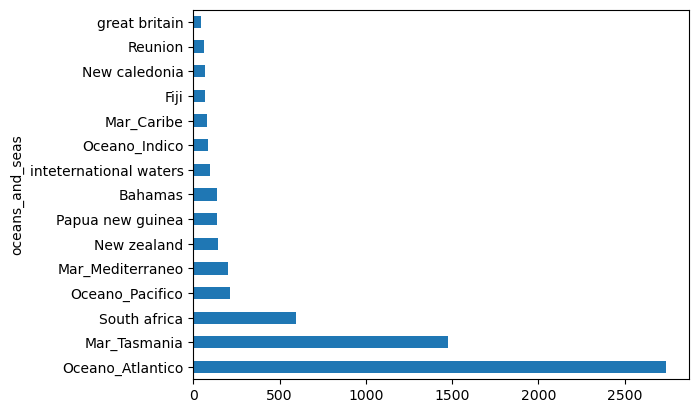

In [39]:
tiburonpaises=tiburon['oceans_and_seas'].value_counts()
tp=tiburonpaises.head(15)
tp.plot.barh()

<Axes: ylabel='year'>

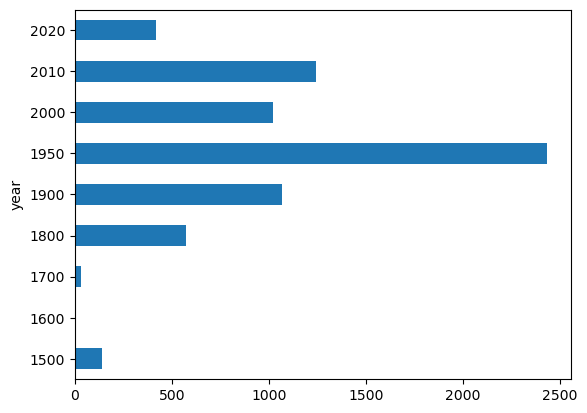

In [25]:
t3=tiburon['year'].value_counts()
t4=t3.sort_index()
t4.plot.barh()

<Axes: ylabel='count'>

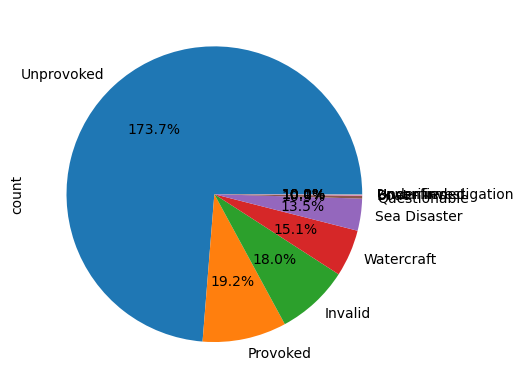

In [20]:
t2=tiburon.type.value_counts()

t2.plot.pie(autopct='1%.1f%%')